In [1]:
%matplotlib inline

« %matplotlib inline » permet d'avoir les graphiques matplotlib mais sans l'interactivité

« %matplotlib notebook »  permet d'avoir les graphiques matplotlib interactifs mais ne fonctionne qu'avec jupyter notebook, et pas avec jupyter lab.

« %matplotlib widget »  fait l'équivalent avec jupyter lab mais il faut procéder à des installations supplémentaires (sous réserve que cela fonctionne) :

    > conda install -c conda-forge nodejs
    
    > pip install ipympl
    
    > jupyter labextension install @jupyter-widgets/jupyterlab-manager
    
    > jupyter labextension install jupyter-matplotlib
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Tracés 3D

## 1. Fonction de x et de y

$\displaystyle f:\;(x,y)\mapsto \sin(3\,x+2\,y)\;\exp\!\left(\frac{-(x^2+y^2)}{5}\right)$

In [3]:
def f(x,y) :
     return np.sin(3*x+2*y)*np.exp(-0.2*(x**2+y**2))
f(0.2,0.4)

0.946809693388421

## 2. Représentation par niveaux

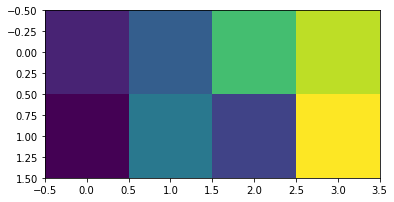

In [4]:
plt.imshow(np.array([[1,3,7,9],[0,4,2,10]]));

In [5]:
nbx,nby = 701, 301
xmin,xmax,ymin,ymax = -3,4,-1,2
X = np.linspace(xmin,xmax,nbx)
Y = np.linspace(ymin,ymax,nby)

### Ce qu'il ne faut pas faire

In [6]:
from time import time
debut = time()
T = np.empty( (nby,nbx) )
for j,xj in enumerate(X) :
    for i,yi in enumerate(Y) :
        T[i,j] = f(xj,yi)
duree = time() - debut
print(f"Calcul effectué en ~{duree:.2e} s")

Calcul effectué en ~4.60e+00 s


### Ce qu'il faut faire : calcul **vectorisé**

In [7]:
np.meshgrid([0,1,2,3],[-1,0,2])

[array([[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]]), array([[-1, -1, -1, -1],
        [ 0,  0,  0,  0],
        [ 2,  2,  2,  2]])]

In [8]:
debut = time()
TX,TY = np.meshgrid(X,Y)
T = f(TX,TY)
del TX,TY
duree = time() - debut
print(f"Calcul effectué en ~{duree:.2e} s")

Calcul effectué en ~4.68e-02 s


## Affichage « correct » en niveaux de couleurs, avec les axes et la légende

(301, 701)

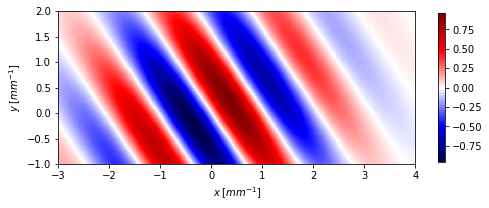

In [9]:
plt.figure(figsize=(8,5))
plt.imshow(T,cmap="seismic",extent=(xmin,xmax,ymin,ymax),
          origin="lower");
plt.xlabel(r"$x\;[mm^{-1}]$")
plt.ylabel(r"$y\;[mm^{-1}]$")
plt.colorbar(shrink=0.55)
T.shape

# Surfaces 3D

In [10]:
from mpl_toolkits.mplot3d import Axes3D

## plot_wireframe

In [11]:
Mx,My = np.meshgrid(X,Y)

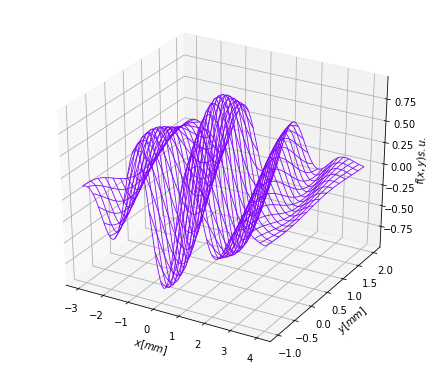

In [12]:
fig = plt.figure(figsize=(7.5,6.5))
g = fig.gca(projection="3d")
g.plot_wireframe(Mx,My,T,rstride=20,cstride=20,linewidth=0.8,color=(0.5,0,1))
g.set_xlabel(r"$x [mm]$")
g.set_ylabel(r"$y [mm]$")
g.set_zlabel(r"$f(x,y) s.u.$");

## plot_surface

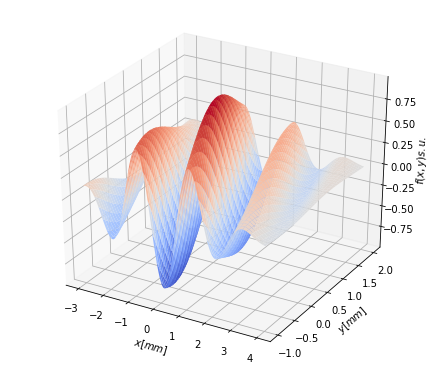

In [13]:
fig2 = plt.figure(figsize=(7.5,6.5))
g2 = fig2.gca(projection="3d")
g2.plot_surface(Mx,My,T,cmap = "coolwarm")
g2.set_xlabel(r"$x [mm]$")
g2.set_ylabel(r"$y [mm]$")
g2.set_zlabel(r"$f(x,y) s.u.$");

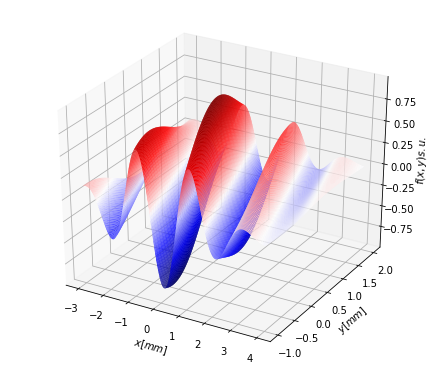

In [14]:
fig3 = plt.figure(figsize=(7.5,6.5))
g3 = fig3.gca(projection="3d")
g3.plot_surface(Mx,My,T,cmap = "seismic",rstride=3,cstride=3)
g3.set_xlabel(r"$x [mm]$")
g3.set_ylabel(r"$y [mm]$")
g3.set_zlabel(r"$f(x,y) s.u.$");